In [1]:
import mlatom as ml
from mlatom.spectra import ir

In [2]:
# Visualize the calculated spectrum
mol = ml.molecule.from_xyz_file('ethanol_init.xyz')
aiqm2 = ml.methods(method='AIQM2')
_ = ml.optimize_geometry(molecule=mol, model=aiqm2, program='geometric')
_ = ml.freq(molecule=mol, model=aiqm2, ir=True, program='pyscf')
mol.dump('ethanol_freq.json', format='json')
#mol.load('ethanol_freq.json',format='json')

In [3]:
print('Optimized geometry')
print(mol.get_xyz_string())
print()
print("Mode     Frequencies     Reduced masses     Force Constants")
print("           (cm^-1)            (AMU)           (mDyne/A)")
for ii in range(len(mol.frequencies)):
    print("%d   %13.4f   %13.4f   %13.4f"%(ii,mol.frequencies[ii],mol.reduced_masses[ii],mol.force_constants[ii]))

Optimized geometry
9

C            -3.8757888541437          -1.2622761408403           0.0093531161968
H            -3.5147169293322          -2.2897467272791          -0.0115720789819
H            -3.5012865398627          -0.7487568663630          -0.8753184958339
H            -4.9661466783656          -1.2732515032080          -0.0275690943305
C            -3.3998580115024          -0.5638274393319           1.2625112591570
H            -3.7703918347260           0.4660630794194           1.2842713105245
H            -3.7793994352488          -1.0810871776526           2.1495613143141
O            -1.9771043502805          -0.5811675365947           1.2466673219004
H            -1.6564204641551          -0.1380559319389           2.0329922668624


Mode     Frequencies     Reduced masses     Force Constants
           (cm^-1)            (AMU)           (mDyne/A)
0        232.1385          1.1451          0.0364
1        285.0563          1.0721          0.0513
2        420.9774     

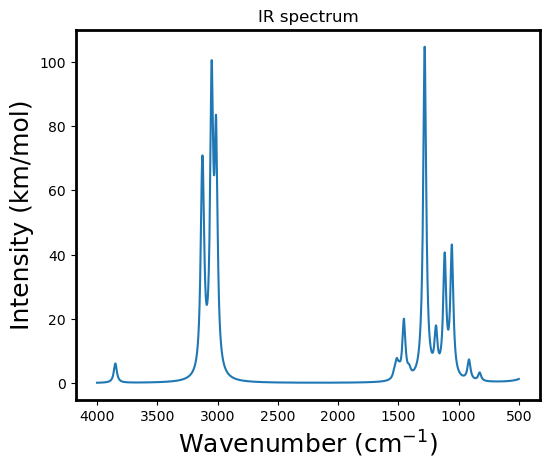

Zero-point vibrational energy: 0.08026476279214442 Hartree
Enthalpy at 298 K: -154.80626341289735 Hartree
Gibbs Free energy at 298 K: -154.83694374633512 Hartree


In [4]:
spectrum = ir.lorentzian(molecule=mol,fwhm=30)
spectrum.plot('IR.png')
linespec = ir(frequencies=mol.frequencies,infrared_intensities=mol.infrared_intensities)
# Check vibration analysis


# Check thermochemistry results
print(f"Zero-point vibrational energy: {mol.ZPE} Hartree")
print(f"Enthalpy at 298 K: {mol.H} Hartree")
print(f"Gibbs Free energy at 298 K: {mol.G} Hartree")

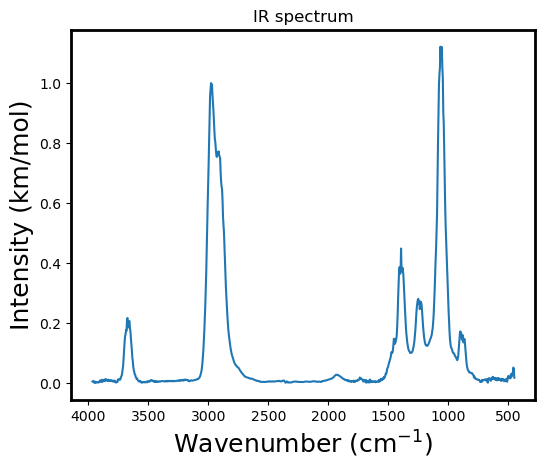

In [5]:
# Visualize the experimental spectrum
exp = ml.spectra.ir.load('exp.txt',format='txt')
exp.plot('exp.png')

Theoretical spectrum is scaled by 0.958


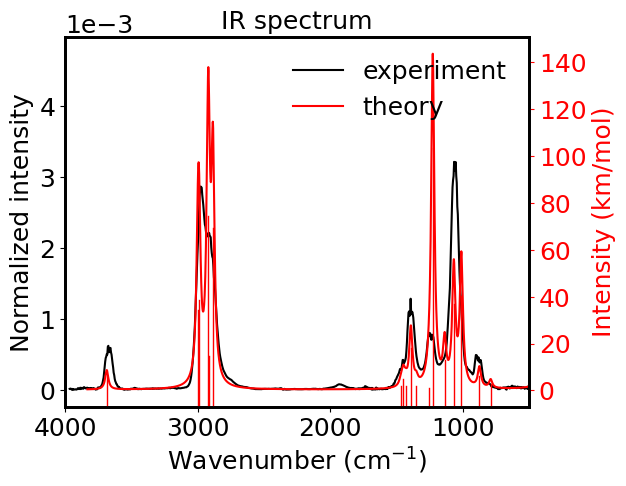

In [6]:
# Plot both spectra together
ml.spectra.plot_ir(spectra=[exp],linespectra=[linespec],
                   molecule=mol,
                   normalize='average',
                   labels=['experiment','theory'],
                   lorentzian=True,
                   scaling_factor=0.958,
                   plotstart=500,plotend=4000)

In [7]:
# Visualize vibrations and highlight corresponding peaks
exp = ml.spectra.ir.load('exp.txt',format='txt')
ml.spectra.plot_ir(spectra=[exp],linespectra=[linespec],
                   molecule=mol,
                   normalize='average',
                   labels=['experiment','theory'],
                   lorentzian=True,
                   band_width_slider=True,
                   peak_highlight_slider=True,
                   scaling_factor=0.958,
                   plotstart=500,plotend=4000)

interactive(children=(FloatSlider(value=30.0, description='width/cm^-1:', max=50.0, min=10.0, readout_format='…